# Importando librerías

In [1]:
import pandas as pd
import numpy as np
# Valores faltantes
import missingno as msno
# Atípicos
import matplotlib.pyplot as plt
import seaborn as sns

from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.prompt import Prompt

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import category_encoders as ce

# Importando la base de datos

In [3]:
df = pd.read_csv('./tarea1/db/hotel_bookings_limpio.csv', encoding='ISO-8859-1')

# Diseño del modelo

###### Crear las variables X (predictoras) e y (objetivo)

In [4]:
# Crear las variables X(predictoras) e y(objetivo)

new_features = ['is_canceled', 'lead_time', 'required_car_parking_spaces','total_of_special_requests']
X = df[new_features].drop(columns=['is_canceled'])  # Variables predictoras
y = df['is_canceled']  # Variable objetivo

###### Dividir los datos en conjuntos de entrenamiento y prueba

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

### 1) Importar el modelo

###### Con arbol de decisión

In [6]:
# Definir variables y crear las transformaciones correspondientes 

encoder  = ce.OrdinalEncoder(cols = [ 'lead_time', 'required_car_parking_spaces','total_of_special_requests'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.fit_transform(X_test)

In [7]:
# Importar arbol de desicion y crear el modelo

tree = DecisionTreeClassifier(max_depth=2,random_state=42)

###### Con Random Forest

In [8]:
# Importar random forest y crear el modelo

random_forest = RandomForestClassifier(n_estimators=10,random_state=42)

###### Con Regresión Logística

In [17]:
# Importar regresion logística y crear el modelo

regression_logistic = LogisticRegression(max_iter=1000)

### 2) Entrenar el modelo

###### Con arbol de decisión

In [9]:
# Entrenar el modelo

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

###### Con Random Forest

In [10]:
# Entrenar el modelo

random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

###### Con Regresión Logística

In [18]:
# Entrenar el modelo

regression_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 3) Evaluación del modelo cálculo del performance

#### Cálculos de las predicciones para posteriormente calcular la performance

###### Con arbol de decisión

In [11]:
# Predicciones para el conjunto de entrenamiento
y_train_pred_tree = tree.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred_tree = tree.predict(X_test)

###### Con Random Forest

In [12]:
# Predicciones para el conjunto de entrenamiento
y_train_pred_random_forest = random_forest.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred_random_forest = random_forest.predict(X_test)

###### Con Regresión Logística

In [19]:
# Predicciones para el conjunto de entrenamiento
y_train_pred_regression_logistic = regression_logistic.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred_regression_logistic = regression_logistic.predict(X_test)

#### Cálculo del performance

###### Con arbol de decisión

In [13]:
# Cálculo de accuracy del train

train_accuracy_tree = accuracy_score( y_train , y_train_pred_tree)

# Cálculo de accuracy del test

test_accuracy_tree = accuracy_score( y_test , y_test_pred_tree)

print('El accuracy de tree en train es: ',train_accuracy_tree)
print('El accuracy de tree en test es: ',test_accuracy_tree)

El accuracy en train es:  0.7243533143660682
El accuracy en test es:  0.7267559421616878


###### Con Random Forest

In [14]:
# Cálculo de accuracy del train

train_accuracy_random_forest = accuracy_score( y_train , y_train_pred_random_forest)

# Cálculo de accuracy del test

test_accuracy_random_forest = accuracy_score( y_test , y_test_pred_random_forest)

print('El accuracy de Rrandom Forest en train es: ',train_accuracy_random_forest)
print('El accuracy de Rrandom Forest en test es: ',test_accuracy_random_forest)

El accuracy en train es:  0.7402138722652801
El accuracy en test es:  0.6857426271412765


###### Con Regresión Logística

In [22]:
# Cálculo de accuracy del train

train_accuracy_regression_logistic = accuracy_score( y_train , y_train_pred_regression_logistic)

# Cálculo de accuracy del test

test_accuracy_regression_logistic = accuracy_score( y_test , y_test_pred_regression_logistic)

print('El accuracy de regression_logistic en train es: ',train_accuracy_regression_logistic)
print('El accuracy de regression_logistic en test es: ',test_accuracy_regression_logistic)

El accuracy de regression_logistic en train es:  0.7248601981752183
El accuracy de regression_logistic en test es:  0.7269085498454847


#### Verificamos le feature importance

###### Con arbol de decisión

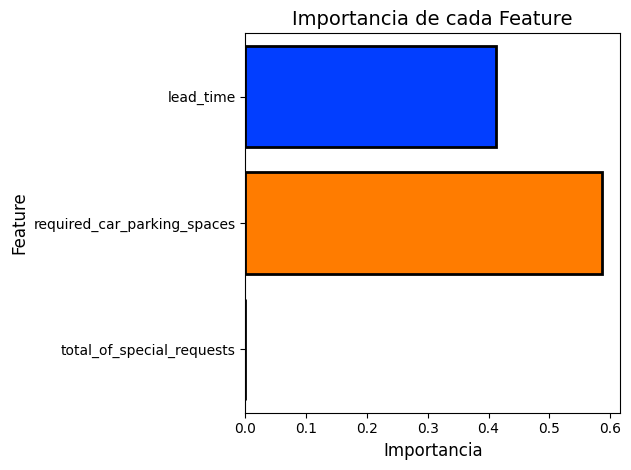

In [15]:
importances = tree.feature_importances_
columns = list(X.columns)

sns.barplot(x=importances, y=columns, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

###### Con Random Forest

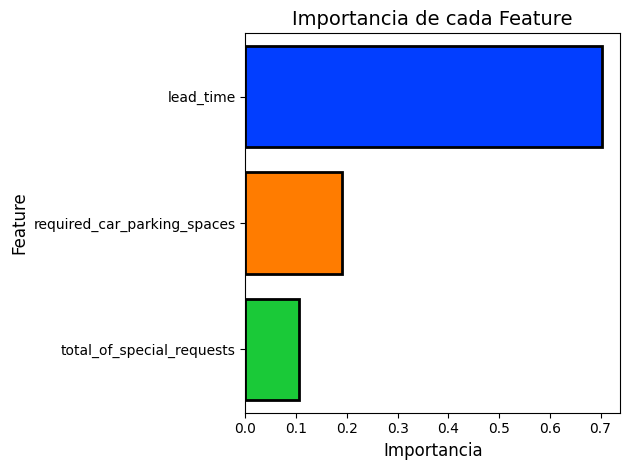

In [16]:
importances = random_forest.feature_importances_
columns = list(X.columns)

sns.barplot(x=importances, y=columns, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

###### Con Regresión Logística

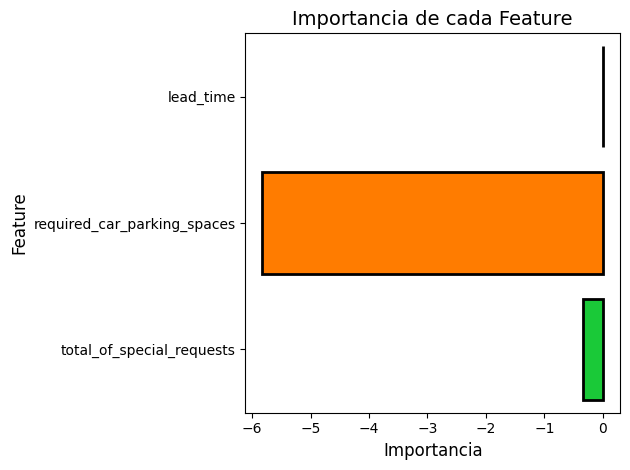

In [23]:
importances = regression_logistic.coef_[0]  # Extrae los coeficientes de la regresión logística
columns = list(X.columns)  # Obtén los nombres de las columnas


sns.barplot(x=importances, y=columns, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()